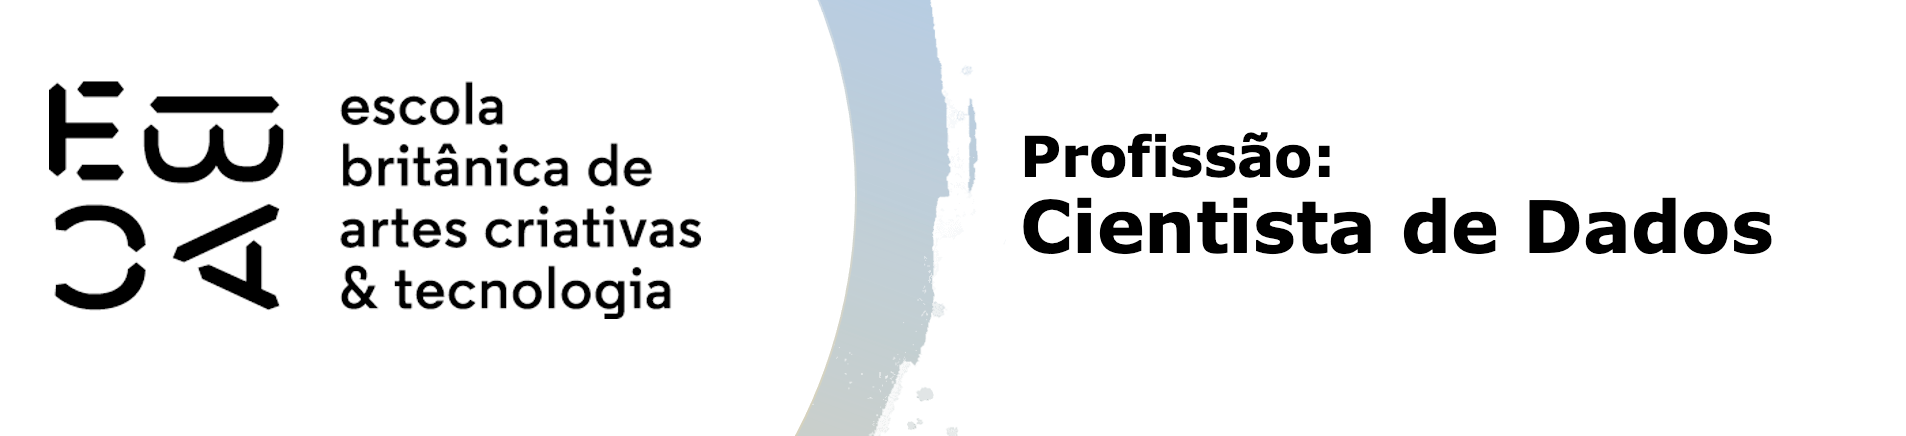

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Como não há valores missing, não será necessário fazer tratamento

In [6]:
df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Para analisar se clientes com diferentes comportamentos de navegação têm propensão a comprar de forma diferente, foram selecionadas variáveis diretamente relacionadas ao processo de compra online. Isso inclui a quantidade de acessos e tempo gasto em páginas de produtos, taxas de rejeição e saída, o valor médio das páginas visitadas antes da compra, o tipo de visitante (novo ou recorrente) e a proximidade a datas festivas. Essas variáveis oferecem insights cruciais sobre o envolvimento do cliente e suas intenções de compra, ajudando a entender melhor o comportamento dos consumidores e a orientar estratégias de marketing e vendas.

In [12]:
# Selecionar as variáveis para o pairplot
variaveis = ['ProductRelated', 'ProductRelated_Duration',
        'ExitRates', 'PageValues', 'SpecialDay']


In [13]:
# Normalizar os dados
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

In [14]:
df_pad.head()

,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay
0,-0.691003,-0.624348,3.229316,-0.317178,-0.308821
1,-0.668518,-0.590903,1.171473,-0.317178,-0.308821
2,-0.691003,-0.624348,3.229316,-0.317178,-0.308821
3,-0.668518,-0.622954,1.994610,-0.317178,-0.308821
4,-0.488636,-0.296430,0.142551,-0.317178,-0.308821


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [15]:
# Determinar o número ótimo de clusters usando o método do cotovelo
SQD = []
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km = km.fit(df_pad)
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

In [16]:
# Visualizar os valores da cotovel
print("Valores do cotovelo para cada número de clusters:")
print(SQD)

Valores do cotovelo para cada número de clusters:
[61649.99999999996, 48412.2807439862, 37531.70819655317, 28755.34059429999, 21121.964860020144, 17124.81772643946, 15073.741330826568, 13290.221727322241, 11798.83487057853, 10717.683750314884, 9905.938566492445, 8999.583691102138, 8439.2632647071, 7742.320175263324]


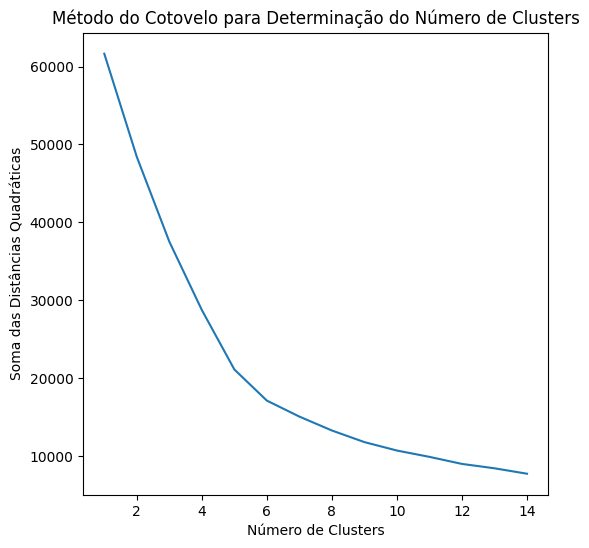

In [17]:
plt.figure(figsize=(6, 6))
plt.plot(K, SQD)
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias Quadráticas')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.show()

In [18]:
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

In [20]:
# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters + 1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(df_pad)
    
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    silueta_media = silhouette_score(df_pad, km.labels_)
    siluetas.append(silueta_media)
    
   

  0%|          | 0/9 [00:00<?, ?it/s]

<Axes: xlabel='n_clusters'>

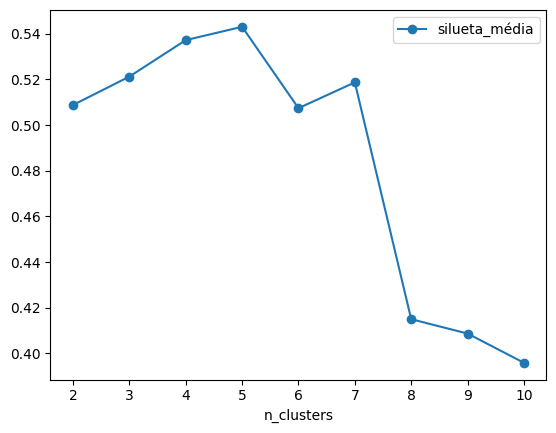

In [21]:
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')

Foram usados as duas técnicas: Método do cotovelo e Coeficiente de Silueta. Em ambos o número de grupo os núemros de grupos evidenciados foram: 4 e 5 respectivamente

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [22]:

# Aplicar KMeans com 2 clusters
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

clusters_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_4.fit_predict(df_pad)

# Aplicar KMeans com 5 clusters
clusters_5 = KMeans(n_clusters=5, random_state=422, n_init=10)
clusters_5.fit_predict(df_pad)



array([2, 2, 2, ..., 1, 1, 1])

In [24]:
# Criar um DataFrame com as variáveis normalizadas e os grupos
df_pad['grupos_4'] = pd.Categorical(clusters_4.labels_)
df_pad['grupos_5'] = pd.Categorical(clusters_5.labels_)

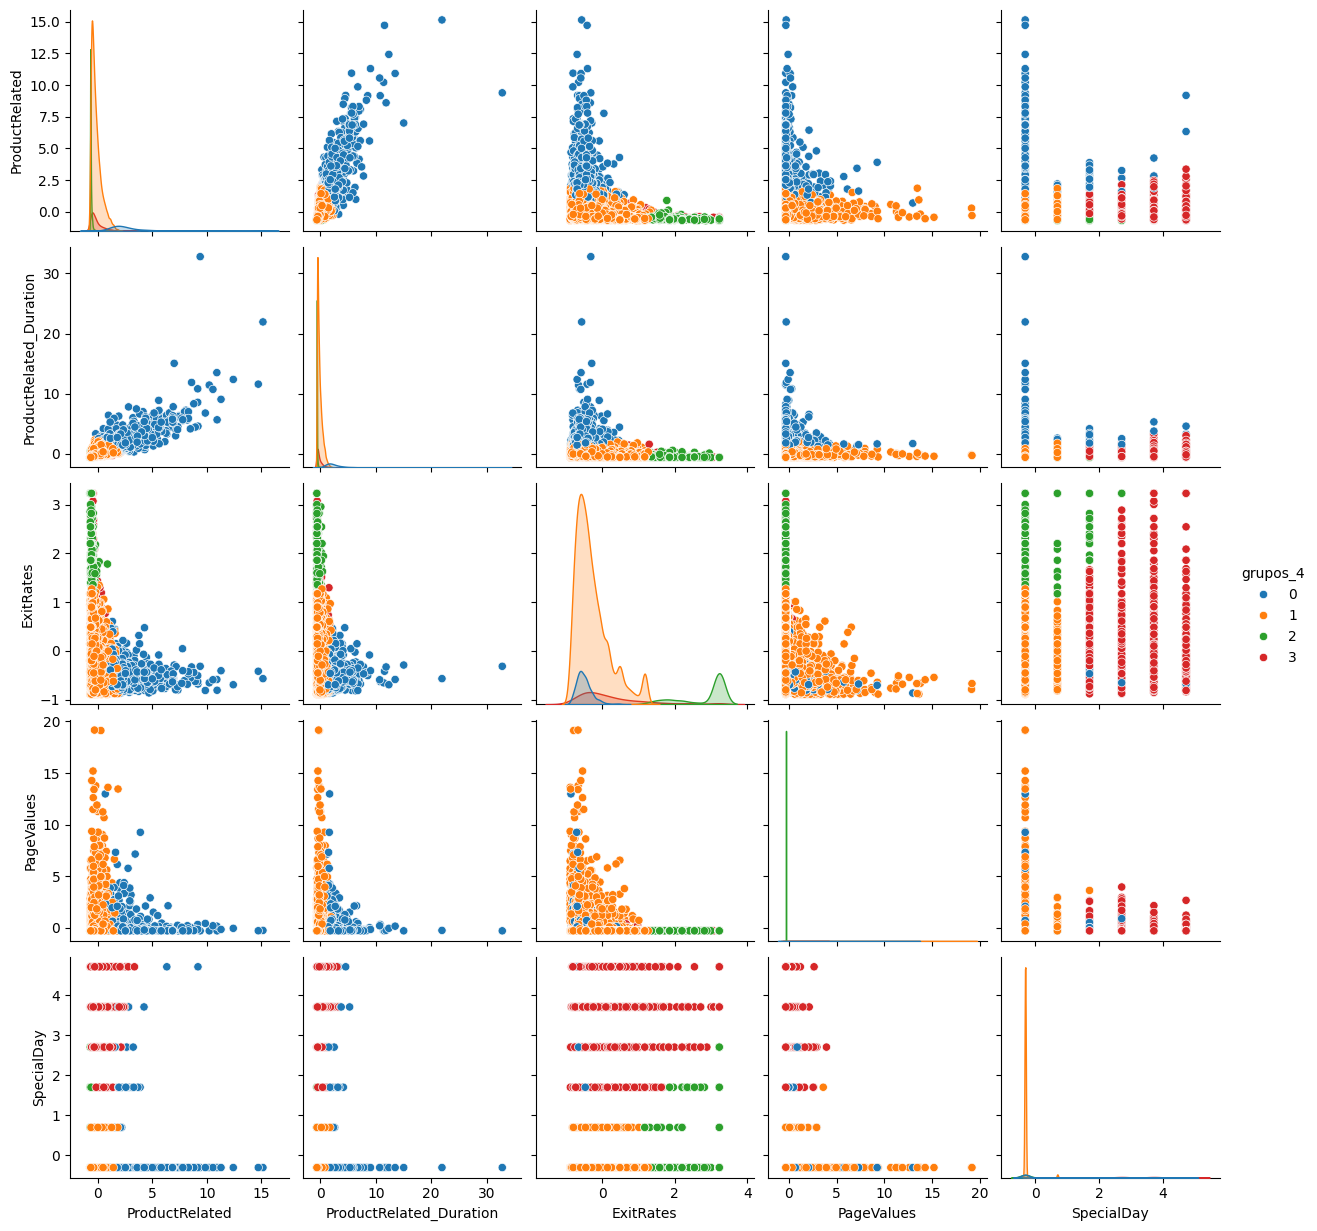

In [25]:
# Gerar o pairplot com clusters (4)
sns.pairplot(df_pad, hue='grupos_4')

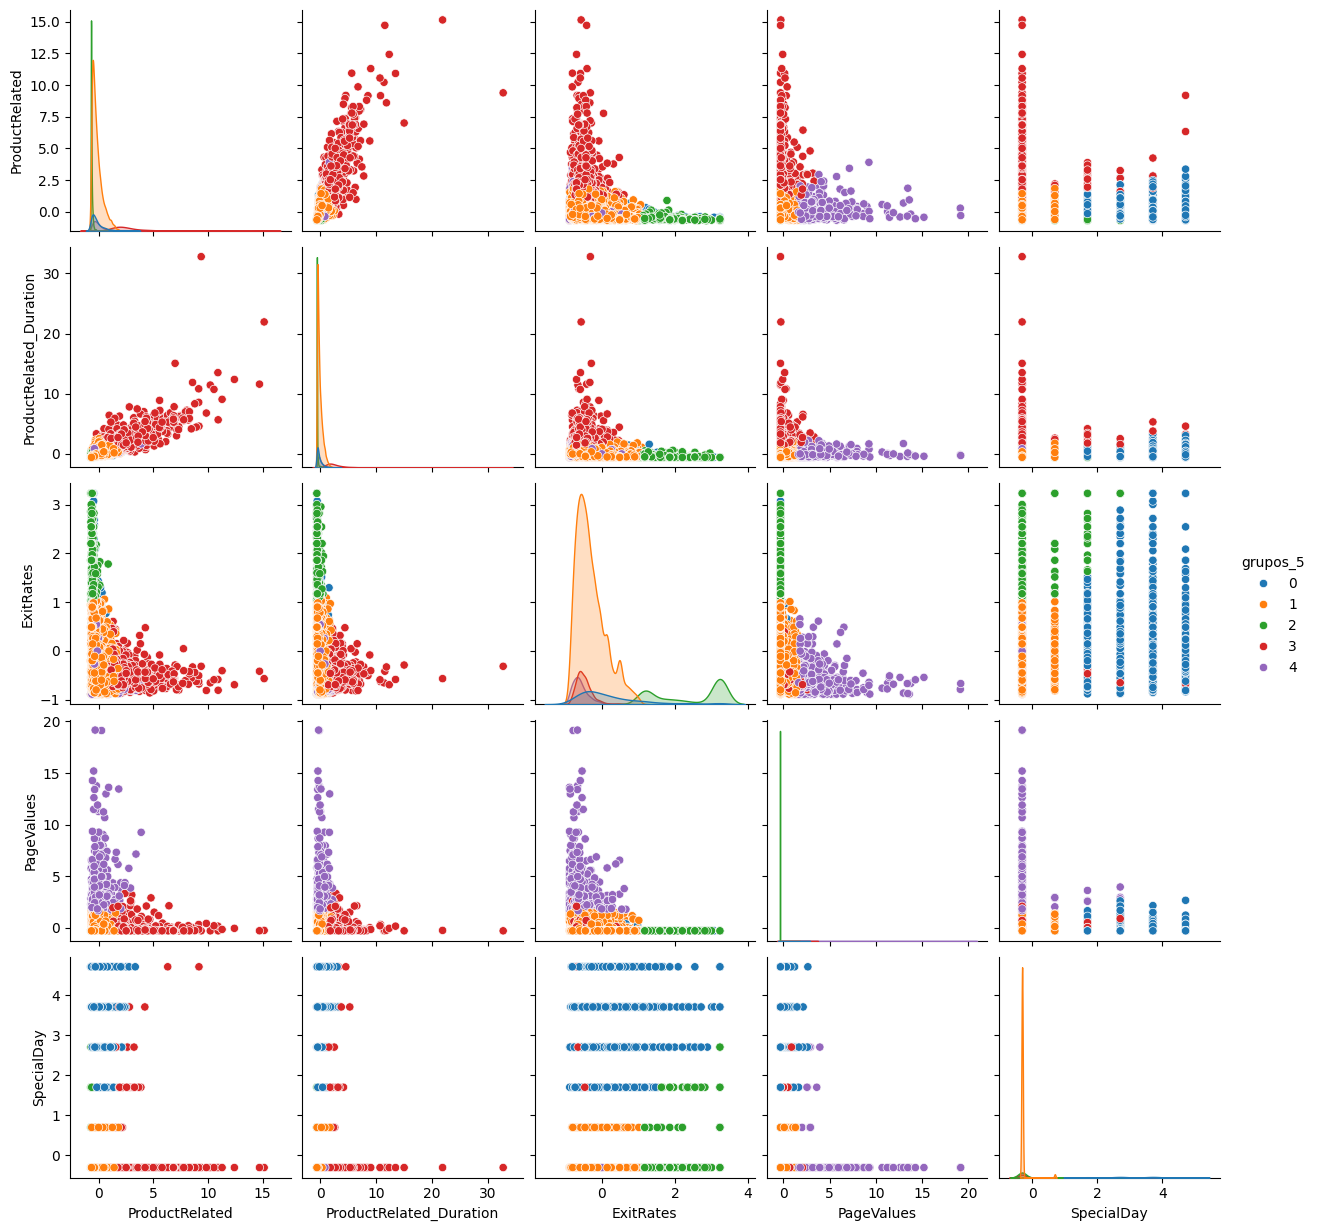

In [26]:
# Gerar o pairplot com clusters (5)
sns.pairplot(df_pad, hue='grupos_5')

# Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?
## Sim, clientes com comportamentos de navegação diferentes possuem propensão a compra diferente.
Os resultados do pairplot mostram que os visitantes que têm maior interação com páginas de produtos (ProductRelated e ProductRelated_Duration) e acessam páginas de alto valor (PageValues) pertencem aos clusters com maior propensão de compra. Em contraste, os visitantes com altas taxas de saída (ExitRates) têm uma menor propensão de compra.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [27]:
df_pad['BounceRates'] = df['BounceRates']
df_pad['Revenue'] = df['Revenue']

<Axes: xlabel='BounceRates', ylabel='grupos_4'>

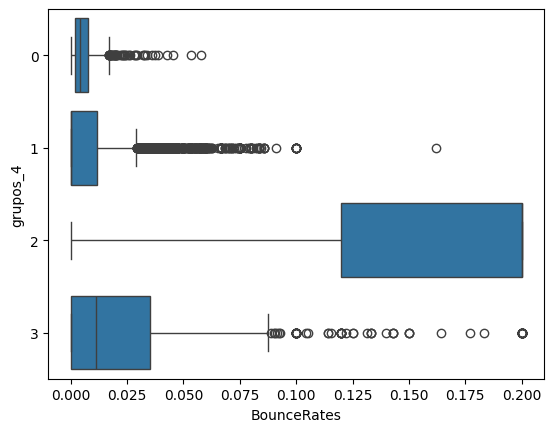

In [28]:
sns.boxplot(data=df_pad, y='grupos_4', x='BounceRates')

<Axes: xlabel='Revenue', ylabel='grupos_4'>

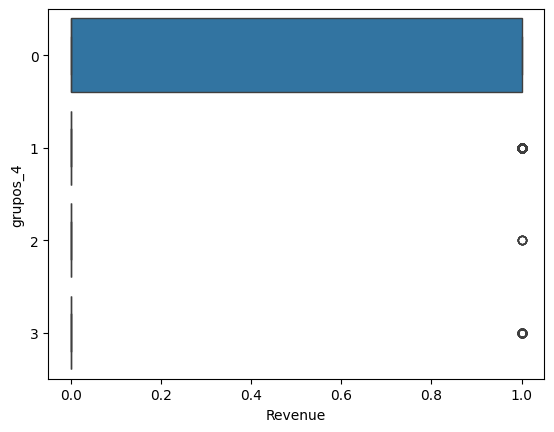

In [31]:
sns.boxplot(data=df_pad, y='grupos_4', x='Revenue')

In [29]:
pd.crosstab(df_pad.Revenue, df_pad.grupos_4)

grupos_4,0,1,2,3
Revenue,,,,
False,561,7946,981,934
True,281,1560,6,61


In [30]:
pd.crosstab(df_pad.Revenue, df_pad.grupos_4, normalize='columns')

grupos_4,0,1,2,3
Revenue,,,,
False,0.666271,0.835893,0.993921,0.938693
True,0.333729,0.164107,0.006079,0.061307


<Axes: xlabel='BounceRates', ylabel='grupos_5'>

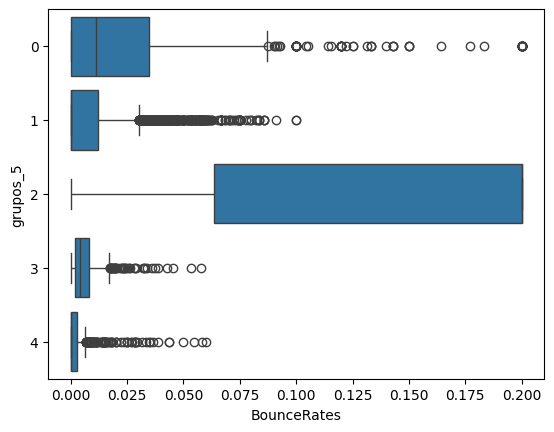

In [33]:
sns.boxplot(data=df_pad, y='grupos_5', x='BounceRates')

<Axes: xlabel='Revenue', ylabel='grupos_5'>

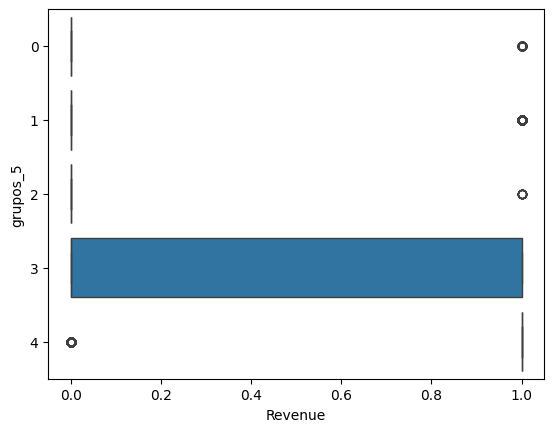

In [35]:
sns.boxplot(data=df_pad, y='grupos_5', x='Revenue')

In [36]:
pd.crosstab(df_pad.Revenue, df_pad.grupos_5)

grupos_5,0,1,2,3,4
Revenue,,,,,
False,928,7511,1312,525,146
True,59,1080,9,251,509


In [37]:
pd.crosstab(df_pad.Revenue, df_pad.grupos_5, normalize='columns')

grupos_5,0,1,2,3,4
Revenue,,,,,
False,0.940223,0.874287,0.993187,0.676546,0.222901
True,0.059777,0.125713,0.006813,0.323454,0.777099


A análise dos box-plot confirma que diferentes comportamentos de navegação influenciam a propensão de compra. Visitantes altamente engajados, com baixos valores de BounceRates e que acessam páginas de alto valor, têm maior probabilidade de realizar compras. 



Os dados das crosstab confirmam que diferentes comportamentos de navegação influenciam a propensão de compra. Clusters específicos, como o Cluster 0 (33.37%) nos 4 clusters e o Cluster 4 (77.71%) nos 5 clusters, mostram uma alta propensão de compra, enquanto outros têm uma baixa propensão.

E com os 77.71% de propensão de compra, com Cluster 4, mostra que de fato o melhor número de grupo é 5, como mostrado na técnica da silhueta